## Tarea 8.1

Jhonatan Jurado Rodríguez

¿Entrenar con más caracteristicas y con base a las probabilidades y dado un input definir a que clase pertenece: 'versicolor', 'virginica' ?

Por ejemplo dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, log_loss

In [16]:
# Cargar el dataset de Iris
iris = load_iris()
X = iris.data  # Todas las características
y = iris.target  # Clases: 0 - setosa, 1 - versicolor, 2 - virginica

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Crear y entrenar el modelo de regresión logística multinomial
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [18]:
# Predecir probabilidades para una muestra dada
X_input = np.array([[4.9, 5.0, 1.8, 0.3]])  # Datos sin escalar
X_input_scaled = scaler.transform(X_input)  # Escalar para coincidir con el entrenamiento
probabilities = model.predict_proba(X_input_scaled)

print("Probabilidades de clasificación")
probabilities_df = pd.DataFrame(probabilities, columns=iris.target_names)
print(probabilities_df)

Probabilidades de clasificación
     setosa  versicolor     virginica
0  0.999823    0.000177  2.196203e-09


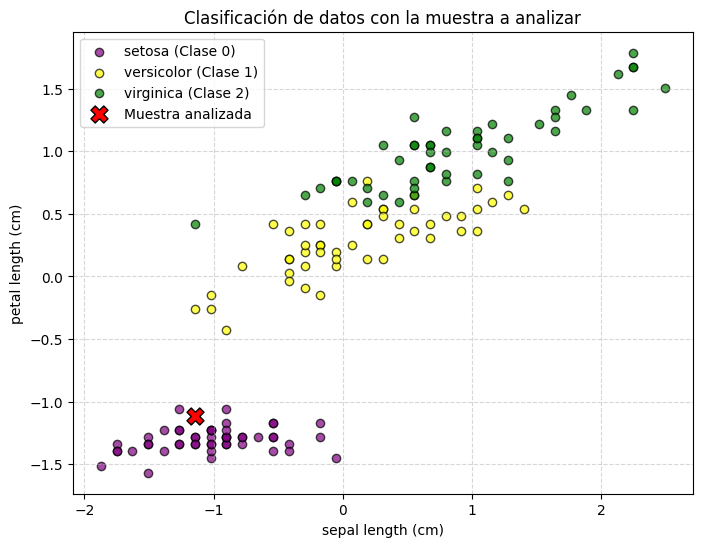

In [19]:
# Crear el gráfico scatter con leyenda indicando cada clase
plt.figure(figsize=(8, 6))

# Usar dos características para la visualización (Longitud del sépalo y longitud del pétalo)
X_plot = X_scaled[:, [0, 2]]  # Tomamos la primera y tercera características
X_input_plot = scaler.transform(X_input)[:, [0, 2]]  # Escalar y seleccionar mismas características

# Graficar los datos de cada clase con etiquetas específicas
for class_index, class_name, color in zip(range(3), iris.target_names, ['purple', 'yellow', 'green']):
    plt.scatter(X_plot[y == class_index, 0], X_plot[y == class_index, 1],
                color=color, edgecolors='k', alpha=0.7, label=f"{class_name} (Clase {class_index})")

# Graficar la muestra analizada en la tarea 8.1
plt.scatter(X_input_plot[0, 0], X_input_plot[0, 1], color='red', edgecolors='black',
            s=150, label="Muestra analizada", marker='X')

plt.xlabel(iris.feature_names[0])  # Longitud del sépalo
plt.ylabel(iris.feature_names[2])  # Longitud del pétalo
plt.title("Clasificación de datos con la muestra a analizar")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
